
For the least squares problem
$$
\begin{array}{ll}
\underset{x\in \mathbb{R}^n}{\mbox{minimize}}&\frac{1}{2m}\|Ax-b\|^2
\end{array}
$$
where $A\in \mathbb{R}^{m\times n}$ and $b\in \mathbb{R}^m$.
GD becomes
$$
x^{k+1}=x^k-\alpha A^T(Ax^k-b)
$$

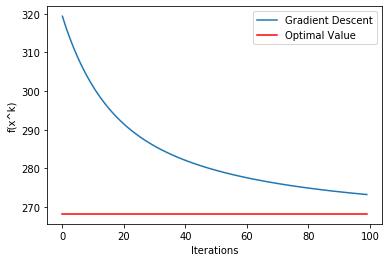

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, n = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(m,m))
V,_ = np.linalg.qr(np.random.randn(n,n))
sig = np.random.rand(n)+0.2
sig[1] = 5
A = U[:,:n]@np.diag(sig)@V
b = np.random.randn(m)

x = np.zeros(n)
alpha = 10  # 10 is roughly the best value

N = 100
f_val = []
for _ in range(N):
    x -= (alpha/m)*A.T@(A@x-b)
    f_val.append(np.linalg.norm(A@x-b)**2)


plt.plot(list(range(N)),f_val, label = "Gradient Descent")
x_star = np.linalg.inv(A.T@A)@A.T@b
plt.plot(list(range(N)),np.linalg.norm(A@np.linalg.inv(A.T@A)@A.T@b-b)**2*np.ones(N), color = "red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel('f(x^k)')
plt.legend()
plt.show()

For the least squares problem
$$
\begin{array}{ll}
\underset{x\in \mathbb{R}^n}{\mbox{minimize}}&\frac{1}{2m}\sum^m_{j=1}(a_j^Tx-b_j)^2
\end{array}
$$
SGD becomes
$$
j_k\sim \mathrm{Uniform}(\{1,\dots,m\})\\
x^{k+1}=x^k-\alpha (a_{j_k}^Tx^k-b_j)a_{j_k}
$$

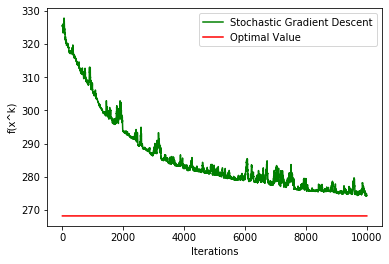

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, n = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(m,m))
V,_ = np.linalg.qr(np.random.randn(n,n))
sig = np.random.rand(n)+0.2
sig[1] = 5
A = U[:,:n]@np.diag(sig)@V
b = np.random.randn(m)

x = np.zeros(n)
alpha = 0.1  #0.1 is roughly the best value

N = 10000
f_val = []
for _ in range(N):
    ind = np.random.randint(m)
    x -= alpha*(A[ind,:]@x-b[ind])*A[ind,:]
    f_val.append(np.linalg.norm(A@x-b)**2)


plt.plot(list(range(N)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.plot(list(range(N)),np.linalg.norm(A@np.linalg.inv(A.T@A)@A.T@b-b)**2*np.ones(N), color ="red", label = "Optimal Value")
plt.xlabel('Iterations')
plt.ylabel('f(x^k)')
plt.legend()
plt.show()

Comparison of SGD vs GD epoch by epoch.

At early stages, SGD is better than GD. Eventually, GD beats SGD. (In this example, GD catches up at about N=300 epochs.)

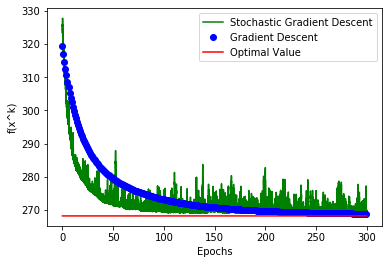

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, n = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(m,m))
V,_ = np.linalg.qr(np.random.randn(n,n))
sig = np.random.rand(n)+0.2
sig[1] = 5
A = U[:,:n]@np.diag(sig)@V
b = np.random.randn(m)

N = 300

x = np.zeros(n)
alpha = 10
f_val_GD = []
for _ in range(N):
    x -= (alpha/m)*A.T@(A@x-b)
    f_val_GD.append(np.linalg.norm(A@x-b)**2)


x = np.zeros(n)
alpha = 0.1
f_val_SGD = []
for kk in range(N*m):
    ind = np.random.randint(m)
    x -= alpha*(A[ind,:]@x-b[ind])*A[ind,:]
    f_val_SGD.append(np.linalg.norm(A@x-b)**2)
    


plt.plot(np.arange(N*m)/m,f_val_SGD, color = "green", label = "Stochastic Gradient Descent")

plt.plot(np.arange(0,N*m,m)/m,f_val_GD, color = "blue", linestyle = "", marker = "o", label = "Gradient Descent")
plt.plot(np.arange(N*m)/m,np.linalg.norm(A@np.linalg.inv(A.T@A)@A.T@b-b)**2*np.ones(N*m), color ="red", label = "Optimal Value")
plt.xlabel('Epochs')
plt.ylabel('f(x^k)')
plt.legend()
plt.show()

For the least squares problem
$$
\begin{array}{ll}
\underset{x\in \mathbb{R}^n}{\mbox{minimize}}&\frac{1}{2m}\|Ax-b\|^2
\end{array}
$$
where $A\in \mathbb{R}^{m\times n}$ and $b\in \mathbb{R}^m$.

SGD vs Mini-batch SGD

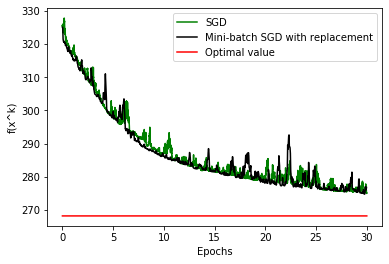

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, n = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(m,m))
V,_ = np.linalg.qr(np.random.randn(n,n))
sig = np.random.rand(n)+0.2
sig[1] = 5
A = U[:,:n]@np.diag(sig)@V
b = np.random.randn(m)

N = 30  #number of epochs


x = np.zeros(n)
alpha = 0.1
f_val_SGD = []
for kk in range(N*m):
    ind = np.random.randint(m)
    x -= alpha*(A[ind,:]@x-b[ind])*A[ind,:]
    f_val_SGD.append(np.linalg.norm(A@x-b)**2)
    

B = 10    #size of minibatch

x = np.zeros(n)
alpha = 0.1  #0.1 is roughly the best value
f_val_MB = []
for _ in range(N*m//B):  # // is integer division
    grad = np.zeros(n)
    for _ in range(B):
        ind = np.random.randint(m)
        grad += (A[ind,:]@x-b[ind])*A[ind,:]
    x -= alpha*grad
    f_val_MB.append(np.linalg.norm(A@x-b)**2)

    

plt.plot(np.arange(N*m)/m,f_val_SGD, color = "green", label = "SGD")
plt.plot(np.arange(N*m//B)*B/m,f_val_MB, color = "black", label = "Mini-batch SGD with replacement")
plt.plot(np.arange(N*m)/m,np.linalg.norm(A@np.linalg.inv(A.T@A)@A.T@b-b)**2*np.ones(N*m), color = "red", label = "Optimal value")
plt.xlabel('Epochs')
plt.ylabel('f(x^k)')
plt.legend()
plt.show()

SGD vs Cyclic SGD vs Shuffled Cyclic SGD

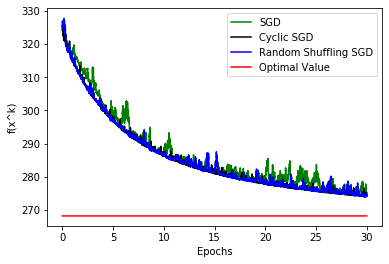

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, n = 300, 30
np.random.seed(0)
U,_ = np.linalg.qr(np.random.randn(m,m))
V,_ = np.linalg.qr(np.random.randn(n,n))
sig = np.random.rand(n)+0.2
sig[1] = 5
A = U[:,:n]@np.diag(sig)@V
b = np.random.randn(m)

N = 30  #number of epochs


x = np.zeros(n)
alpha = 0.1
f_val_SGD = []
for kk in range(N*m):
    ind = np.random.randint(m)
    x -= alpha*(A[ind,:]@x-b[ind])*A[ind,:]
    f_val_SGD.append(np.linalg.norm(A@x-b)**2)
    

x = np.zeros(n)
alpha = 0.1
f_val_cyclic = []
for j in range(N*m):
    ind = j % m
    x -= alpha*(A[ind,:]@x-b[ind])*A[ind,:]
    f_val_cyclic.append(np.linalg.norm(A@x-b)**2)

    
x = np.zeros(n)
alpha = 0.1
f_val_shuffle_cyclic = []
for j in range(N*m):
    if j%m == 0:
        perm = np.random.permutation(np.arange(m))
    ind = perm[j%m]
    x -= alpha*(A[ind,:]@x-b[ind])*A[ind,:]
    f_val_shuffle_cyclic.append(np.linalg.norm(A@x-b)**2)

plt.plot(np.arange(N*m)/m,f_val_SGD, color = "green", label = "SGD")
plt.plot(np.arange(N*m)/m,f_val_cyclic, color = "black", label = "Cyclic SGD")
plt.plot(np.arange(N*m)/m,f_val_shuffle_cyclic, color = "blue", label = "Random Shuffling SGD")
plt.plot(np.arange(N*m)/m,np.linalg.norm(A@np.linalg.inv(A.T@A)@A.T@b-b)**2*np.ones(N*m), color = "red", label = "Optimal Value")
plt.xlabel('Epochs')
plt.ylabel('f(x^k)')
plt.legend()
plt.show()

# PyTorch

__PyTorch__ is a machine learning library of Python. 

PyTorch is fundamentally a numerical computation library, and it shares a lot of similarities with NumPy.

Key differences that make PyTorch suitable for using neural networks and machine learning.
1. PyTorch supports easy GPU computation.
2. Automatic differentiation.
3. Numerous ML libraries and sample code.

Think of it as a replacement for NumPy. In PyTorch, people say _tensor_ rather than _array_.

In [1]:
import numpy as np
import torch
print("torch version:", torch.__version__)

print('Create a zero ndarray in NumPy:')
zero_np = np.zeros([2, 3])
print(zero_np)
print('Create a zero tensor in PyTorch:')
zero_pt = torch.zeros([2,3])
print(zero_pt)

print(zero_np.shape)
print(zero_pt.shape)

torch version: 1.7.0
Create a zero ndarray in NumPy:
[[0. 0. 0.]
 [0. 0. 0.]]
Create a zero tensor in PyTorch:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
(2, 3)
torch.Size([2, 3])


You can index elements of PyTorch tensors as you index elements of NumPy arrays.

In [17]:
print(zero_np[0,1])
print(zero_pt[0,1])
print(zero_pt[0,1].item())  #convert scalar tensors into regular number

0.0
torch.Size([])
0.0


A ndarray can be converted into a tensor, and vice versa.

In [19]:
zero_pt_from_np = torch.tensor(zero_np)
print(zero_pt_from_np)

zero_np_from_pt = zero_pt.numpy()
print(zero_np_from_pt)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
[[0. 0. 0.]
 [0. 0. 0.]]


The _rank_ of a tensor is the number of dimensions.

In [30]:
print(len(zero_pt.shape))

2


Use `numel()` to obtain the total number of elements. (Unlike in Numpy, `size()` is the same as `shape`.)

In [41]:
print(zero_pt.numel())
print(torch.tensor(zero_pt.shape).prod().item())

print(zero_np.size)

6
6
6
torch.Size([2, 3])
torch.Size([2, 3])


## Reshaping PyTorch Tensors

In [51]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

# t = t.reshape(12,1)
# print(t)
# print(t.shape)  #rank preserved

t = t.reshape(2,2,3)
print(t)
print(t.shape)  #rank changed

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])
torch.Size([2, 2, 3])


_Squeezing_ removed dimensions with length 1 and _unsqueezing_ adds a dimension with length 1.

In [58]:
# s = t.reshape(12,1).squeeze()
# print(s)
# print(s.shape)  #rank reduced

s = t.reshape(12,1).unsqueeze(dim=0)
print(s)
print(s.shape)  #rank reduced

tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [3.],
         [3.]]])
torch.Size([1, 12, 1])


Tensors often have the structure (batch)x(data).

A _batch_ is used in the sense of batch SGD.

If the data is a 2D color image, you have the 4D tensor of (batch)x(x-axis)x(y-axis)x(RGB channel).

To use GPU computing, first check whether a GPU is available.

In [7]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
4


Use `.to(device)` to create a copy of a tensor on the GPU

In [46]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

# device = torch.device("cpu")
device = torch.device("cuda:0")
#device = torch.device("cuda:5") #error if you have fewer than 6 GPUs

t_dev = t.to(device)

print(t.device)
print(t_dev.device)

cpu
cuda:0


Perform power iteration

In [2]:
import torch
import numpy as np
N = 8192
A = torch.tensor(np.random.normal(0,1/np.sqrt(N),(N,N)))    #8*8192^2=512Mb data
x = torch.tensor(np.random.normal(0.0, 1.0,(N,1)))


# device = torch.device("cpu")
device = torch.device("cuda:0")
A = A.to(device)
x = x.to(device)    #error if A is sent to GPU but x is not sent to GPU

import time
start = time.time()
for _ in range(100):
    x = torch.matmul(A,x)
end = time.time()
print("Time ellapsed in loop is: {}".format(end - start))

x = x.to("cpu")
print(np.linalg.norm(x))

RuntimeError: Expected object of backend CUDA but got backend CPU for argument #2 'mat2'

# Logistic regression with PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1

In [ ]:
'''
Step 2: Define the neural network class
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=True)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

In [ ]:
'''
Step 3: Create the model, specify loss function and optimizer.
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)   # specify SGD with learning rate

In [ ]:
'''
Step 4: Train model with SGD
'''
for _ in range(1000) :
    # Sample a random data for training
    ind = randint(0, len(train_set.data)-1)
    image, label = train_set.data[ind], train_set.targets[ind]

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()

    #(This syntax will make more sense once we learn about minibatches)

    # perform SGD step (parameter update)
    optimizer.step()

In [ ]:
'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Evaluate accuracy using test data
for ind in range(len(test_set.data)) :

    image, label = test_set.data[ind], test_set.targets[ind]

    # evaluate model
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_set.data), correct, len(test_set.data),
        100. * correct / len(test_set.data)))

In [ ]:
'''
Step 6: Show some incorrectly classified images and some correctly classified ones
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

Inspect model parameters

In [ ]:
# model parameters visible as an iterator (a generator is an iterator)
print(model.parameters())

for parameter in model.parameters():
    print(parameter.shape)

# model parameter directly obtainable from layer
print(model.linear)
print(model.linear.weight.shape)
# print(model.linear.bias)  #available if bias=True


# # evaluate the model several equivalent ways
print(model.linear.bias)  #available if bias=True
print(torch.sum(model.linear.weight.detach()*test_set.data[0].reshape(28*28))+model.linear.bias)
# print(model.linear(test_set.data[0].float().view(-1, 28*28)).detach())
print(model(test_set.data[0]))

print(test_set.targets[0])

In [ ]:
# view the weight trained through logistic regression
weight = model.linear.weight.detach().reshape(28,28).numpy()
weight = weight - np.min(weight)
weight = weight/np.max(weight)
plt.imshow(weight, cmap='gray')
plt.show()

DataLoader utility simplifies accessing data in training and testing

0it [00:00, ?it/s]

9920512it [00:03, 3108162.53it/s]                             


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 50697.63it/s]            
0it [00:00, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw


1654784it [00:01, 1283217.56it/s]                            
0it [00:00, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


8192it [00:00, 16984.45it/s]            


Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Processing...
Done!
[Test set] Average loss: 0.1500, Accuracy: 1904/1991 (95.63%)



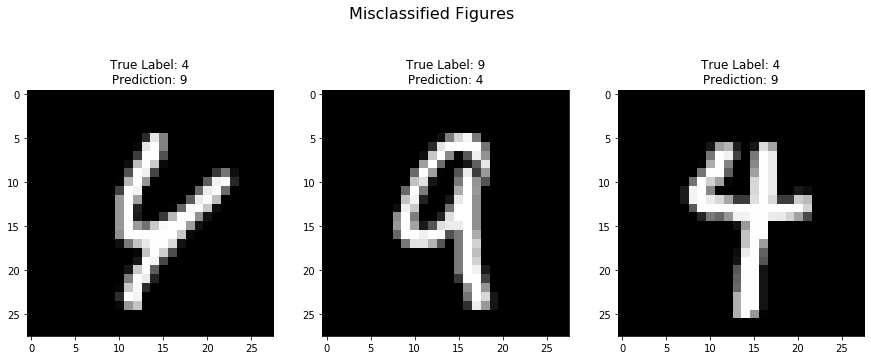

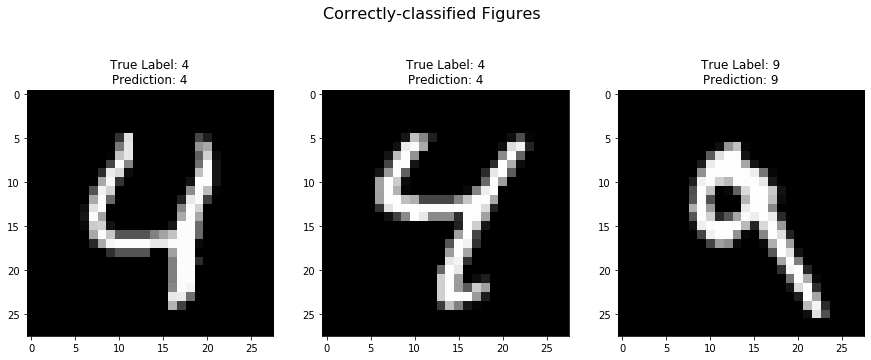

In [5]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: (LOOK HERE)
'''
model = LR()                                   

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                               
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # LR scaled up by 255
# For some reason, the DataLoader scales the image by a factor of 255.
    
'''
Step 4: Train model with SGD (LOOK HERE)
'''
# Use DataLoader class (Press Ctrl+/ to comment in/out)

# 1. SGD
# from torch.utils.data import RandomSampler
# train_loader = DataLoader(dataset=train_set, batch_size=1, sampler=RandomSampler(train_set, replacement=True))

# 2. cyclic SGD
# train_loader = DataLoader(dataset=train_set, batch_size=1)

# 3. random reshuffled SGD
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)

# Train the model
iter_count = 0
for image,label in train_loader :
    iter_count += 1
    if iter_count > 1000:
        break

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()

    # perform SGD step (parameter update)
    optimizer.step()


'''
Step 5: Test model (LOOK HERE)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

The data loader creates a <i>generator</i> that end when all data has been processed

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms


'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: (same step)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate

    
'''
Step 4: Train model with SGD (LOOK HERE)
'''

# shuffled cyclic SGD
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)

# Train the model (single epoch)
for image, label in train_loader :

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()

    # perform SGD step (parameter update)
    optimizer.step()


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()


Running multiple epochs

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: (same step)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate



'''
Step 4: Train model with SGD (LOOK HERE)
'''
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)

import time
start = time.time()
# Train the model for 3 epochs
for epoch in range(3) :
    for image, label in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(image), label.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))

'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()


Using batch update

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer. (LOOK HERE)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate



'''
Step 4: Train model with SGD (LOOK HERE)
'''
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

import time
start = time.time()
# Train the model (for 3 epochs)
for epoch in range(3) :
    for images, labels in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

CIFAR10 (two classes) with logistic regression trained with shuffled cyclic batch SGD

0it [00:00, ?it/s]

100%|█████████▉| 170344448/170498071 [00:18<00:00, 7398850.03it/s]

Extracting ./cifar_data/cifar-10-python.tar.gz to ./cifar_data/
[Test set] Average loss: 2765.7470, Accuracy: 1235/2000 (61.75%)



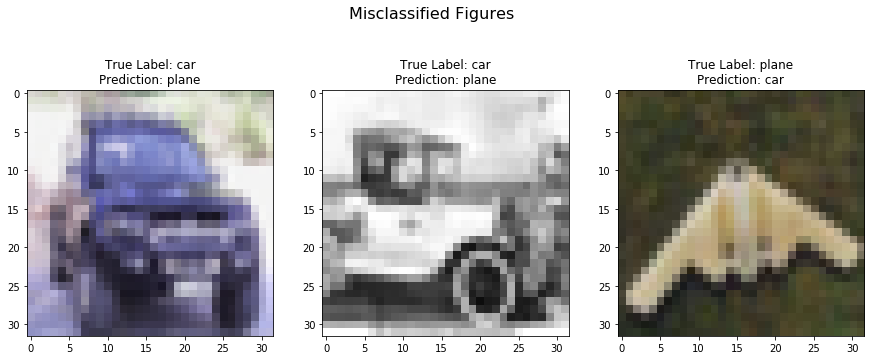

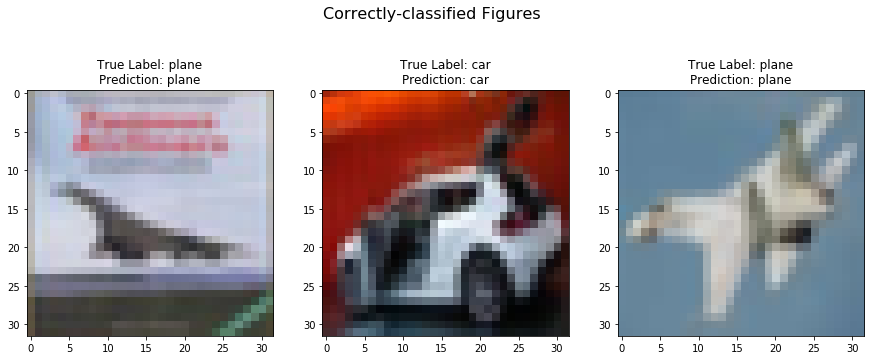

170500096it [00:29, 7398850.03it/s]                               

In [7]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

import matplotlib.pyplot as plt


'''
Step 1: Prepare dataset
'''
# Use only 2 labels
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_1 = classes.index('plane')
label_2 = classes.index('car')

# dataset class for our custom data
class CIFAR10_2class(datasets.CIFAR10) :
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform,
                                                 target_transform=target_transform, download=download)
        
        self.data = torch.tensor(self.data)
        self.targets = torch.tensor(self.targets)
        
        idx = (self.targets == label_1) + (self.targets == label_2)
        self.data = self.data[idx]
        self.targets = self.targets[idx].view(-1, 1)
        self.targets[self.targets == label_1] = -1
        self.targets[self.targets == label_2] = 1

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

    def __len__(self):
        return len(self.data)   
        
        
# CIFAR-10 training data
train_set = CIFAR10_2class(root='./cifar_data/', train=True, transform=transforms.ToTensor(), download=True)

# CIFAR-10 testing data
test_set = CIFAR10_2class(root='./cifar_data/', train=False, transform=transforms.ToTensor())



'''
Step 2: Define the neural network class.
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)
        # The network parameters are part of the neural network object.
        # therefore they are initialized as class attributes in the __init__ method
        
    ''' forward given input x '''
    def forward(self, x) :
        # The forward network defines how the neurons are combined to form the network.
        # How the connections are formed, and what activation functions are used are defined here.
        # The definition here should not introduce new parameters.
        x = self.linear(x.float().view(-1, 3*32*32))    # Flattens the given data(tensor)
        return x
    

'''
Step 3: Create the model, specify loss function and optimizer.
'''
model = LR()  # Define Neural Network Models 

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))
loss_function = logistic_loss                            # Specify loss function

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)  # specify SGD with learning rate



'''
Step 4: Train model with SGD
'''
# Use DataLoader class
train_loader = DataLoader(dataset=train_set, batch_size=1024, shuffle=True)

# Train the model
for epoch in range(10) :
    for images, labels in train_loader :

        # Clear previously computed gradient
        optimizer.zero_grad()
        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
    

'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)
    
    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))



'''
Step 6: Show some incorrectly classified images and some correctly classified ones
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]
    
    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_2]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_1]))
    plt.imshow(image)
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_1]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_2]))
    plt.imshow(image)
plt.show()

CIFAR10 with Multilayer perceptron (estimated runetime = 2 minutes)

Files already downloaded and verified
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[Test set] Average loss: 0.3070, Accuracy: 1736/2000 (86.80%)



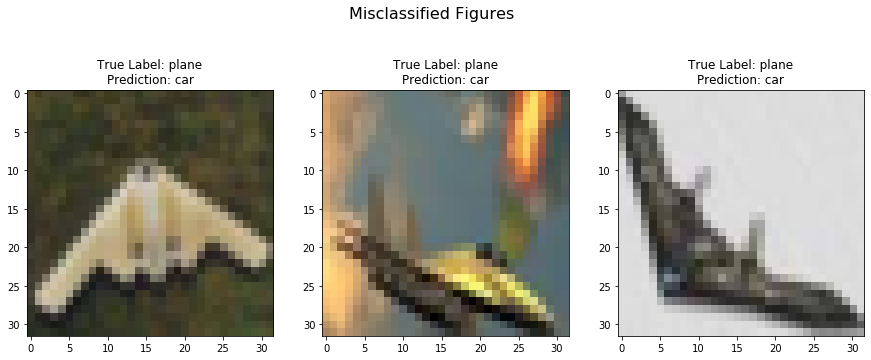

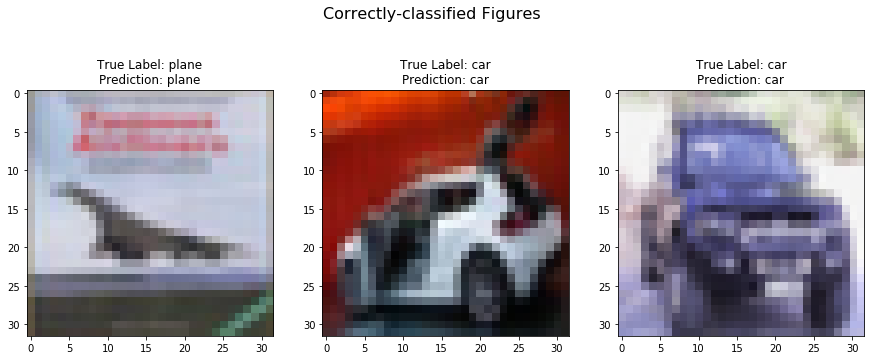

In [15]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
from numpy import linspace


'''
Step 1: (same step)
'''
# Use only 2 labels
classes = ('plane', 'car', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_1 = classes.index('plane')
label_2 = classes.index('car')

# dataset class for our custom data
class CIFAR10_2class(datasets.CIFAR10) :
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform,
                                                 target_transform=target_transform, download=download)
        
        self.data = torch.tensor(self.data)
        self.targets = torch.tensor(self.targets)
        
        idx = (self.targets == label_1) + (self.targets == label_2)
        self.data = self.data[idx]
        self.targets = self.targets[idx].view(-1, 1)
        self.targets[self.targets == label_1] = -1
        self.targets[self.targets == label_2] = 1

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

    def __len__(self):
        return len(self.data)   
        
        
# CIFAR-10 training data
train_set = CIFAR10_2class(root='./cifar_data/', train=True, transform=transforms.ToTensor(), download=True)

# CIFAR-10 testing data
test_set = CIFAR10_2class(root='./cifar_data/', train=False, transform=transforms.ToTensor())


'''
Step 2: Define the neural network class (LOOK HERE)
'''
class MLP4(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, input_dim//2, bias=True)
        self.linear2 = nn.Linear(input_dim//2, input_dim//4, bias=True)
        self.linear3 = nn.Linear(input_dim//4, input_dim//8, bias=True)
        self.linear4 = nn.Linear(input_dim//8, 1, bias=True)
        
    ''' forward given input x '''
    def forward(self, x) :
        x = x.float().view(-1, 3*32*32)
        x = nn.functional.relu(self.linear(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = self.linear4(x)
        return x
    
    
'''
Step 3: Create the model, specify loss function and optimizer (LOOK HERE)
'''
model = MLP4()  # Define Neural Network Models 

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))
loss_function = logistic_loss                            # Specify loss function

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)  # specify SGD with learning rate



'''
Step 4: (same step)
'''
# Use DataLoader class
train_loader = DataLoader(dataset=train_set, batch_size=1024, shuffle=True)

# Train the model

for epoch in range(100) :
    print(epoch)
    for images, labels in train_loader :

        # Clear previously computed gradient
        optimizer.zero_grad()
        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
    

'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)
    
    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))



'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]
    
    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_2]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_1]))
    plt.imshow(image)
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_1]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_2]))
    plt.imshow(image)
plt.show()

Examine total parameter count

In [9]:
import torch
import torch.nn as nn

class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=True)
        # The network parameters are part of the neural network object.
        # therefore they are initialized as class attributes in the __init__ method
        
    ''' forward given input x '''
    def forward(self, x) :
        # The forward network defines how the neurons are combined to form the network.
        # How the connections are formed, and what activation functions are used are defined here.
        # The definition here should not introduce new parameters.
        x = self.linear(x.float().view(-1, 3*32*32))    # Flattens the given data(tensor)
        return x
    


class MLP4(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, input_dim//2, bias=True)
        self.linear2 = nn.Linear(input_dim//2, input_dim//4, bias=True)
        self.linear3 = nn.Linear(input_dim//4, input_dim//8, bias=True)
        self.linear4 = nn.Linear(input_dim//8, 1, bias=True)
        
    ''' forward given input x '''
    def forward(self, x) :
        x = x.float().view(-1, 3*32*32)
        x = nn.functional.relu(self.linear(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = self.linear4(x)
        return x
    
    

model1 = LR()
model2 = MLP4()

print("LR model parameters")
param_num = 0
for parameter in model1.parameters():
    print(parameter.shape)
    param_num += parameter.numel()
print("LR has a total of {} parameters.".format(param_num))
print("--------------------------------------------------------------------------------")

print("MLP4 model parameters")    
param_num = 0
for parameter in model2.parameters():
    print(parameter.shape)
    param_num += parameter.numel()
print("MLP4 has a total of {} parameters.".format(param_num))

LR model parameters
torch.Size([1, 3072])
torch.Size([1])
LR has a total of 3073 parameters.
--------------------------------------------------------------------------------
MLP4 model parameters
torch.Size([1536, 3072])
torch.Size([1536])
torch.Size([768, 1536])
torch.Size([768])
torch.Size([384, 768])
torch.Size([384])
torch.Size([1, 384])
torch.Size([1])
MLP4 has a total of 6196225 parameters.


Use GPU acceleration  (estimated runetime with 10 epochs = 10s, 1s with CPU, GPU)

Files already downloaded and verified
Time ellapsed in training is: 13.362385034561157
[Test set] Average loss: 0.4238, Accuracy: 1626/2000 (81.30%)



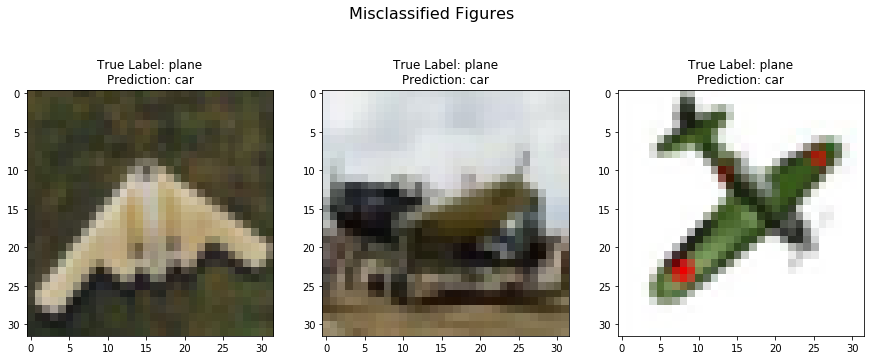

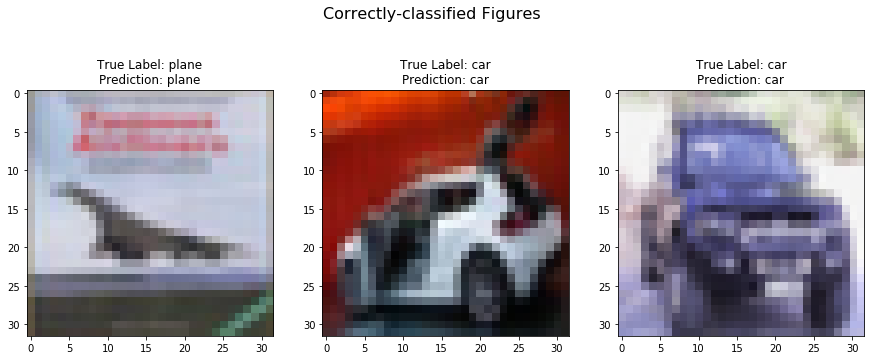

In [12]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import numpy as np



# choose device
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
# device = torch.device("cuda:1")

'''
Step 1: Prepare dataset (LOOK HERE)
'''
# Use only 2 labels
classes = ('plane', 'car', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_1 = classes.index('plane')
label_2 = classes.index('car')


# dataset class for our custom data
class CIFAR10_2class(datasets.CIFAR10) :
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform,
                                                 target_transform=target_transform, download=download)
        # Move data to GPU if possible
        self.data = torch.tensor(self.data).to(device)
        self.targets = torch.tensor(self.targets).to(device)
        
        idx = (self.targets == label_1) + (self.targets == label_2)
        self.data = self.data[idx]
        self.targets = self.targets[idx].view(-1, 1)
        self.targets[self.targets == label_1] = -1
        self.targets[self.targets == label_2] = 1

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

    def __len__(self):
        return len(self.data)   
        
        
# CIFAR-10 training data
train_set = CIFAR10_2class(root='./cifar_data/', train=True, transform=transforms.ToTensor(), download=True)

# CIFAR-10 testing data
test_set = CIFAR10_2class(root='./cifar_data/', train=False, transform=transforms.ToTensor())



'''
Step 2: (same step)
'''
class MLP4(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, input_dim//2, bias=True)
        self.linear2 = nn.Linear(input_dim//2, input_dim//4, bias=True)
        self.linear3 = nn.Linear(input_dim//4, input_dim//8, bias=True)
        self.linear4 = nn.Linear(input_dim//8, 1, bias=True)
        
    ''' forward given input x '''
    def forward(self, x) :
        x = x.float().view(-1, 3*32*32)
        x = nn.functional.relu(self.linear(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = self.linear4(x)
        return x
    
    
'''
Step 3: Create the model and send model to device (LOOK HERE)
        specify loss function and optimizer
'''
model = MLP4().to(device)                               # Define Neural Network Models 

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))
loss_function = logistic_loss                            # Specify loss function

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)  # specify SGD with learning rate



'''
Step 4: (same step)
'''
# Use DataLoader class
train_loader = DataLoader(dataset=train_set, batch_size=1024, shuffle=True)

# Train the model

import time
start = time.time()
for epoch in range(10) :
    for images, labels in train_loader :

        # Clear previously computed gradient
        optimizer.zero_grad()
        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))
    

'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []


# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)
    
    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))


'''
Step 6: (same step)
''' 
# Misclassified images
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]
    
    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_2]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_1]))
    plt.imshow(image)
plt.show()

# Correctly classified images
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_1]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_2]))
    plt.imshow(image)
plt.show()

Softmax regression for MNIST

In [13]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

'''
Step 1: Load the entire MNIST dataset
'''
class MNIST_class(datasets.MNIST) :
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform,
                                                 target_transform=target_transform, download=download)
        
        # Move data to GPU
        self.data = self.data.to(device)
        self.targets = self.targets.to(device)
            
    def __getitem__(self, index):
        return self.data[index], self.targets[index]

    def __len__(self):
        return len(self.data)


# MNIST training data
train_set = MNIST_class(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

test_set = MNIST_class(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)


'''
Step 2: Since there are 10 classes, the output should be 10
'''
class softmax(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 10, bias=True)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer
'''
model = softmax().to("cpu")                         # Define a Neural Network Model

loss_function = torch.nn.CrossEntropyLoss()     # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)   # specify SGD with learning rate



'''
Step 4: Train model with SGD
'''
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

import time
start = time.time()
for epoch in range(1) :
    for images, labels in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label).item()

    # Get index of maximum log-probability
    pred = output.max(1, keepdim=True)[1]

    # Trace correct predictions
    correct += pred.eq(label.view_as(pred)).sum().item()

            
# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))


0it [00:00, ?it/s]


 77%|███████▋  | 7634944/9912422 [00:02<00:00, 3309365.61it/s]
9920512it [00:03, 3200973.24it/s]                             


Extracting ./mnist_data/MNIST_class/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST_class/raw



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 52123.03it/s]            

0it [00:00, ?it/s]

Extracting ./mnist_data/MNIST_class/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST_class/raw



 53%|█████▎    | 868352/1648877 [00:01<00:00, 797098.90it/s]
1654784it [00:01, 1166343.43it/s]                             

0it [00:00, ?it/s]

Extracting ./mnist_data/MNIST_class/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST_class/raw



8192it [00:00, 17388.96it/s]            


Extracting ./mnist_data/MNIST_class/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST_class/raw
Processing...
Done!
Time ellapsed in training is: 1.735095500946045
[Test set] Average loss: 14.3008, Accuracy: 8897/10000 (88.97%)



In [14]:
print("Softmax model parameters")
param_num = 0
for parameter in model.parameters():
    print(parameter.shape)
    param_num += parameter.numel()
print("Softmax has a total of {} parameters.".format(param_num))

Softmax model parameters
torch.Size([10, 784])
torch.Size([10])
Softmax has a total of 7850 parameters.


Usually, the dataset is kept by the host and batches are send to the device every iteration.

In [36]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

'''
Step 1
'''
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())
'''
Step 2 
'''
class softmax(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x) :
        return self.linear(x.view(-1, 28*28))

'''
Step 3
'''
model = softmax().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)


'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(5) :
    print("{}th epoch starting.".format(epoch))
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
Time ellapsed in training is: 32.66519212722778
[Test set] Average loss: 0.0029, Accuracy: 9186/10000 (91.86%)



LeNet5 architecture

(Using tanh, avg pool, no Gaussian connections, and complete C3 connections)

In [38]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False, 
                              transform=transforms.ToTensor())


'''
Step 2: LeNet5
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        #padding=2 makes 28x28 image into 32x32
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(1, 6, kernel_size=5, padding=2),
                nn.Tanh()
                )
        self.pool_layer1 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.Tanh()
                )
        self.pool_layer2 = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
#         self.conv_layer3 = nn.Sequential(
#                 nn.Conv2d(16, 120, kernel_size=5),
#                 nn.Tanh()
#                 )
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.Tanh()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.Tanh()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
#         output = self.conv_layer3(output)
#         output = output.view(-1, 120)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)  # lr hand-tuned

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(10) :
    print("{}th epoch starting.".format(epoch))
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
Time ellapsed in training is: 83.03261947631836
[Test set] Average loss: 0.0004, Accuracy: 9863/10000 (98.63%)



Modern variant of LeNet5

(Using ReLU, max pool, no Gaussian connections, and complete C3 connections)

In [39]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False, 
                              transform=transforms.ToTensor())

'''
Step 2
'''
class LeNet(nn.Module) :
    
    def __init__(self) :
        super(LeNet, self).__init__()
        
        #padding=2 makes 28x28 image into 32x32
        self.conv_layer1 = nn.Sequential(
                nn.Conv2d(1, 6, kernel_size=5, padding=2),
                nn.ReLU()
                )
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_layer2 = nn.Sequential(
                nn.Conv2d(6, 16, kernel_size=5),
                nn.ReLU()
                )
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.ReLU()
                )
        self.fc_layer1 = nn.Sequential(
                nn.Linear(120, 84),
                nn.ReLU()
                )
        self.fc_layer2 = nn.Linear(84, 10)
        
        
    def forward(self, x) :
        output = self.conv_layer1(x)
        output = self.pool_layer1(output)
        output = self.conv_layer2(output)
        output = self.pool_layer2(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.fc_layer1(output)
        output = self.fc_layer2(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)  # lr hand-tuned

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

import time
start = time.time()
for epoch in range(10) :
    print("{}th epoch starting.".format(epoch))
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))

0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
Time ellapsed in training is: 82.53149819374084
[Test set] Average loss: 0.0004, Accuracy: 9857/10000 (98.57%)

